with-in class difference:



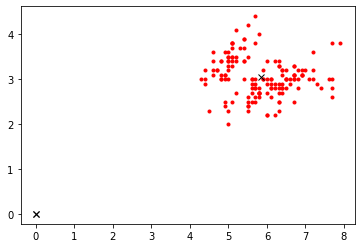

wicd: 291.6102540833085
standard score:



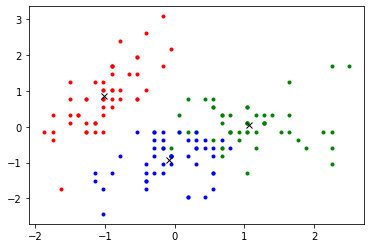

wicd: 128.99771709880827
scaling:



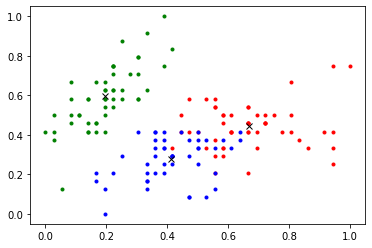

wicd: 29.436129527525683


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 24 20:18:39 2018

@author: user
"""

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import random

iris = datasets.load_iris()
X = iris.data
X1 = (X - np.tile(X.mean(0), (X.shape[0],1)))/np.tile(X.std(0),(X.shape[0],1))#std score
X2 = (X - np.tile(X.min(0), (X.shape[0],1)))/np.tile(X.max(0) - X.min(0), (X.shape[0],1))#scaling
#----------------------------------------------------------------------
#if the data are far from each other
#def normalization()
#----------------------------------------------------------------------
def kmeans(sample, K, max_it):
    N = sample.shape[0]#total sample number
    D = sample.shape[1]#sample dimention
    idx = random.sample(range(N), K)#從N中產生K個sample
    C = np.zeros((K, D))#K center
    L = np.zeros((N, 1))#group no. of each sample
    dist = np.zeros((N, K))
    it = 0
    while(it<max_it):
        for i in range(K):
            dist[:,i] = np.sum((sample-np.tile(C[i,:],(N,1)))**2,1)#算距離(矩正相減)
        L1 = np.argmin(dist,1)#跟哪個點最近
        if(it>0 and np.array_equal(L,L1)):
            break
        L = L1
        for i in range(K):
            idx = np.nonzero(L==i)[0]
            if(len(idx)>0):
                C[i,:]=np.mean(sample[idx,:],0)
        it+=1
    wicd = np.sum(np.sqrt(np.sum((sample - C[L,:])**2, axis=1)))#within class distance
    return C,L, wicd #C:k centers, L:which center do those point classified to

C,L,wicd = kmeans(X,3,1000)
G1 = X[L==0,:]
G2 = X[L==1,:]
G3 = X[L==2,:]
plt.plot(G1[:, 0], G1[:, 1],'r.', G2[:, 0], G2[:, 1],'g.', G3[:, 0], G3[:, 1],'b.')
plt.plot(C[:,0],C[:,1],'kx')#draw center as x
print("with-in class difference:\n")
plt.show()
print('wicd:',wicd)

C,L,wicd = kmeans(X1,3,1000)
G1 = X1[L==0,:]
G2 = X1[L==1,:]
G3 = X1[L==2,:]
plt.plot(G1[:, 0], G1[:, 1],'r.', G2[:, 0], G2[:, 1],'g.', G3[:, 0], G3[:, 1],'b.')
plt.plot(C[:,0],C[:,1],'kx')#draw center as x
print("standard score:\n")
plt.show()
print('wicd:',wicd)

C,L,wicd = kmeans(X2,3,1000)
G1 = X2[L==0,:]
G2 = X2[L==1,:]
G3 = X2[L==2,:]
plt.plot(G1[:, 0], G1[:, 1],'r.', G2[:, 0], G2[:, 1],'g.', G3[:, 0], G3[:, 1],'b.')
plt.plot(C[:,0],C[:,1],'kx')#draw center as x
print("scaling:\n")
plt.show()
print('wicd:',wicd)